In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report , mean_absolute_error , mean_squared_error ,r2_score
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
import warnings

warnings.filterwarnings('ignore') #To Handle Prediction Function

In [28]:
df = pd.read_csv(r"network performance2.csv")

In [29]:
print("data shape: ",df.shape , "\n")
print("data head: \n ")
df.head(20)


data shape:  (17871, 9) 

data head: 
 


,test_number,avg_lat_ms,tests,devices,centroid_lat,centroid_lon,city,avg_d_speed_mbps,avg_u_speed_mbps
0,0,4,1,1,27.569156,27.567444,Qaşr al Farāfirah,91.528,94.732
1,1,17,1,1,27.134924,27.924500,Qaşr al Farāfirah,76.459,64.054
2,2,13,7,3,27.061572,27.875061,Qaşr al Farāfirah,24.891,15.299
3,3,14,4,2,27.066463,27.891541,Qaşr al Farāfirah,36.193,56.719
4,4,11,10,2,27.061572,27.891541,Qaşr al Farāfirah,101.906,80.136
5,5,19,3,2,27.061572,27.968445,Qaşr al Farāfirah,19.036,3.546
6,6,26,1,1,27.066463,27.973938,Qaşr al Farāfirah,2.456,3.851
7,7,19,1,1,31.524703,30.786438,Disūq,1.537,1.885
8,8,155,5,1,31.449753,30.621643,Rosetta,1.691,0.341
9,9,24,1,1,31.449753,30.627136,Rosetta,3.032,0.362


In [30]:
df.columns.tolist()


['test_number',
 'avg_lat_ms',
 'tests',
 'devices',
 'centroid_lat',
 'centroid_lon',
 'city',
 'avg_d_speed_mbps',
 'avg_u_speed_mbps']

In [31]:
df.describe()


,test_number,avg_lat_ms,tests,devices,centroid_lat,centroid_lon,avg_d_speed_mbps,avg_u_speed_mbps
count,17871.000000,17871.000000,17871.000000,17871.000000,17850.000000,17659.000000,17871.000000,17871.000000
mean,8935.000000,37.065637,42.168653,11.246936,30.253244,31.248577,24.320553,9.353365
std,5159.057666,72.937887,140.815593,102.817435,0.685434,0.409624,39.175021,22.929844
min,0.000000,0.000000,1.000000,1.000000,24.674474,27.567444,0.004000,0.004000
25%,4467.500000,13.000000,2.000000,1.000000,30.004895,30.995178,9.288000,1.275000
50%,8935.000000,21.000000,7.000000,2.000000,30.299389,31.236877,16.839000,2.928000
75%,13402.500000,35.000000,31.000000,8.000000,30.696973,31.456604,24.440000,5.192500
max,17870.000000,2456.000000,13422.000000,13311.000000,31.524703,33.192444,791.794000,491.476000


In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17871 entries, 0 to 17870
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   test_number       17871 non-null  int64  
 1   avg_lat_ms        17871 non-null  int64  
 2   tests             17871 non-null  int64  
 3   devices           17871 non-null  int64  
 4   centroid_lat      17850 non-null  float64
 5   centroid_lon      17659 non-null  float64
 6   city              17871 non-null  object 
 7   avg_d_speed_mbps  17871 non-null  float64
 8   avg_u_speed_mbps  17871 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 1.2+ MB


In [33]:
df.isna().sum()


test_number           0
avg_lat_ms            0
tests                 0
devices               0
centroid_lat         21
centroid_lon        212
city                  0
avg_d_speed_mbps      0
avg_u_speed_mbps      0
dtype: int64

In [34]:
df.columns.tolist()


['test_number',
 'avg_lat_ms',
 'tests',
 'devices',
 'centroid_lat',
 'centroid_lon',
 'city',
 'avg_d_speed_mbps',
 'avg_u_speed_mbps']

In [35]:
len(df.city.unique())


87

In [36]:
df.city.value_counts()

city
Cairo                           1586
Al Khānkah                      1509
Al ‘Āshir min Ramaḑān           1025
Madīnat as Sādis min Uktūbar     724
Bilbays                          526
                                ... 
Al Qūşīyah                         7
Sawādah                            5
Rosetta                            2
Maţāy                              1
Al Qays                            1
Name: count, Length: 87, dtype: int64

In [37]:
# =========================
# 1. Encode categorical column
# =========================
encoder = LabelEncoder()
df["city"] = encoder.fit_transform(df["city"])


In [38]:
df.city.value_counts()

city
32    1586
7     1509
19    1025
46     724
29     526
      ... 
15       7
70       5
66       2
50       1
12       1
Name: count, Length: 87, dtype: int64

In [39]:
# =========================
# 2. Remove duplicate ROWS (no columns dropped)
# =========================
df = df.drop_duplicates().reset_index(drop=True)



In [40]:
# =========================
# 3. Handle missing values using KNN Imputer
# =========================
imputer = KNNImputer(n_neighbors=200)

df_imputed = pd.DataFrame(
    imputer.fit_transform(df),
    columns=df.columns
)


In [41]:
# =========================
# 4. Handle outliers (IQR capping, dropping rows)
# =========================
numeric_cols = df_imputed.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    Q1 = df_imputed[col].quantile(0.25)
    Q3 = df_imputed[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_imputed = df_imputed[
        (df_imputed[col] >= lower) & (df_imputed[col] <= upper)
    ]


In [42]:
# =========================
# 5. Sanity checks
# =========================
print("Missing values after preprocessing:")
print(df_imputed.isna().sum())



Missing values after preprocessing:
test_number         0
avg_lat_ms          0
tests               0
devices             0
centroid_lat        0
centroid_lon        0
city                0
avg_d_speed_mbps    0
avg_u_speed_mbps    0
dtype: int64


In [43]:
print("\nDuplicate rows after preprocessing:")
print(df_imputed.duplicated().sum())




Duplicate rows after preprocessing:
0


In [44]:
print("\nPreview:")
print(df_imputed.head())




Preview:
    test_number  avg_lat_ms  tests  devices  centroid_lat  centroid_lon  city  \
7           7.0        19.0    1.0      1.0     31.524703     30.786438  36.0   
9           9.0        24.0    1.0      1.0     31.449753     30.627136  66.0   
10         10.0        53.0    8.0      2.0     31.398191     30.758972  36.0   
12         12.0        28.0    1.0      1.0     31.365364     30.769959  36.0   
13         13.0        24.0    9.0      2.0     31.365364     30.802917  36.0   

    avg_d_speed_mbps  avg_u_speed_mbps  
7              1.537             1.885  
9              3.032             0.362  
10            24.689             3.138  
12             5.366             7.242  
13             3.542             0.636  


In [45]:
#Splitting Data into x,y
#x Features Y Target

x= df_imputed.drop("centroid_lat", axis=1)
y=df_imputed["centroid_lat"]



In [46]:
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [47]:
x_train,x_test,y_train,y_test =train_test_split( x , y , test_size=0.2 , random_state=43 ) 


In [48]:
lg = LinearRegression()
lg.fit(x_train,y_train)
y_prediction=lg.predict(x_test)


In [49]:
#Calculate Mean Absolute Error , R2 Squared
MAE = mean_absolute_error(y_test,y_prediction)
RMSE = np.sqrt(mean_squared_error(y_test, y_prediction))
R2 = r2_score(y_test,y_prediction)
print(f"Mean Absolute Error (MAE): {MAE:.4f} \n")
print(f"Root Mean Squared Error (RMSE): {RMSE:.4f} \n")
print(f"R2 : {R2:.4f} => {R2*100:.2f}%")


Mean Absolute Error (MAE): 0.1358 

Root Mean Squared Error (RMSE): 0.1850 

R2 : 0.8813 => 88.13%


In [50]:
new_data = np.array([[ 1 , 4 , 1 , 1 , 27.567444 , 61 , 94.732 , 91.732 ]])
new_data_scalled = scaler.transform(new_data)
PRED = lg.predict(new_data_scalled)
print("predicted input value",PRED[0])


predicted input value 28.54756060992559


In [51]:
Comparability =pd.DataFrame({"Actual Data":y_test,"Predicted Data":y_prediction})
Comparability.head(10)


,Actual Data,Predicted Data
7144,30.503117,30.666292
8013,30.171250,30.304475
10113,30.626095,30.539787
17355,29.192931,29.341177
2844,31.069403,30.961003
3450,30.857437,30.776438
8506,30.408413,30.428836
6984,30.555166,30.664207
499,31.139954,31.000675
1515,30.564626,30.764538


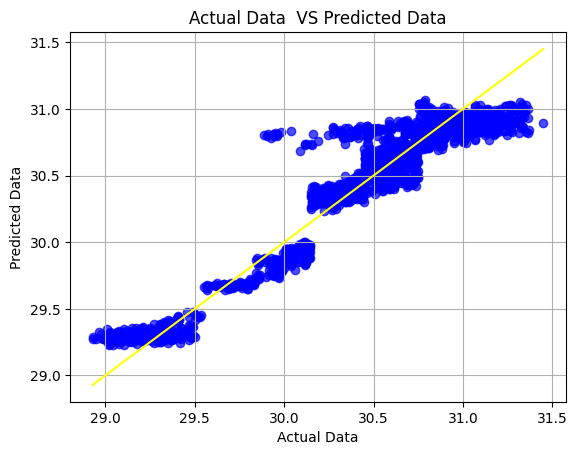

In [52]:
plt.scatter ( y_test,  y_prediction , alpha =0.7,color ='blue')
plt.plot([y_test.min() ,y_test.max()],[y_test.min() ,y_test.max()] , color ='yellow')
plt.title ('Actual Data  VS Predicted Data')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.grid(True)
plt.show()